In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from math import sqrt
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
R²: 0.802561303423698


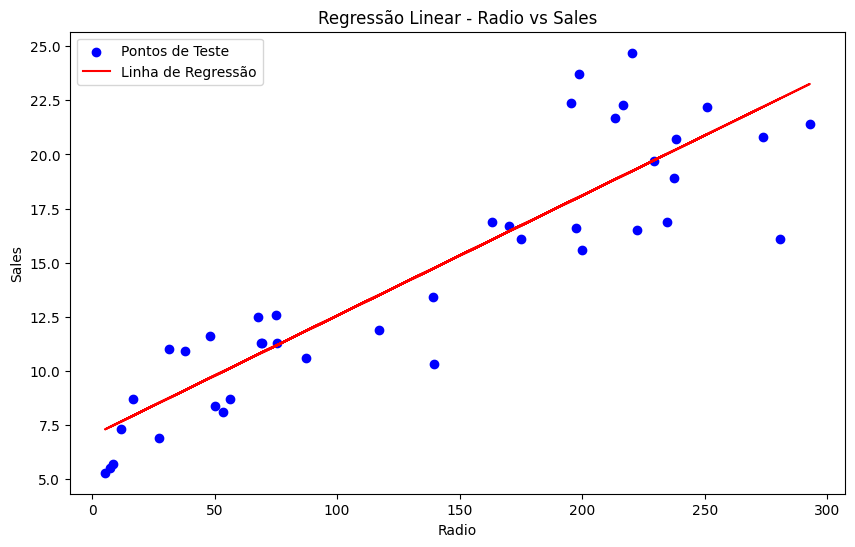

In [2]:
# Carregar os dados
df = pd.read_csv('advertising.csv', sep=',')
print(df.head())  # Inspecionar os primeiros dados

# Preparar os dados
X = np.array(df['TV']).reshape(-1, 1)
Y = np.array(df['Sales']).reshape(-1, 1)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Criar e ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, Y_train)

# Fazer previsões
Y_predict = model.predict(X_test)

# Calcular o R²
r2 = r2_score(Y_test, Y_predict)
print(f"R²: {r2}")

# Plotar os dados de teste e a linha de regressão
plt.figure(figsize=(10, 6))

# Plotar os pontos reais
plt.scatter(X_test, Y_test, color='blue', label='Pontos de Teste')

# Plotar a linha de regressão
plt.plot(X_test, Y_predict, color='red', label='Linha de Regressão')

# Configurar os rótulos dos eixos e o título
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Regressão Linear - Radio vs Sales')

# Adicionar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()



[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

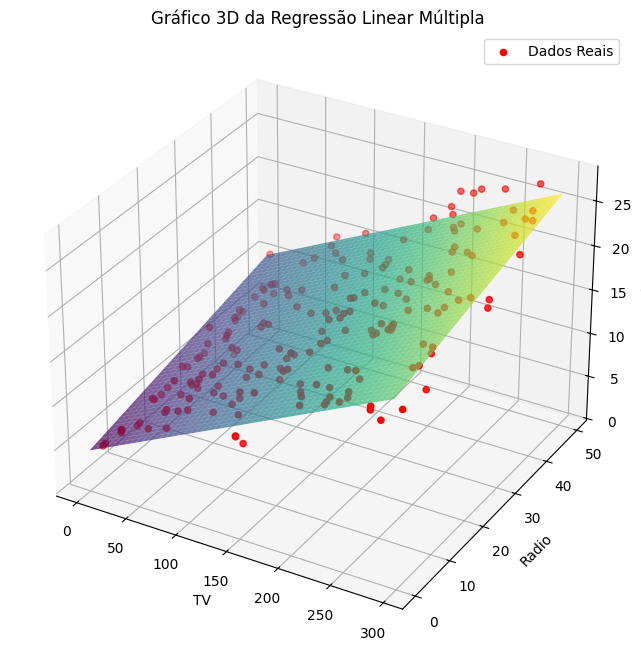

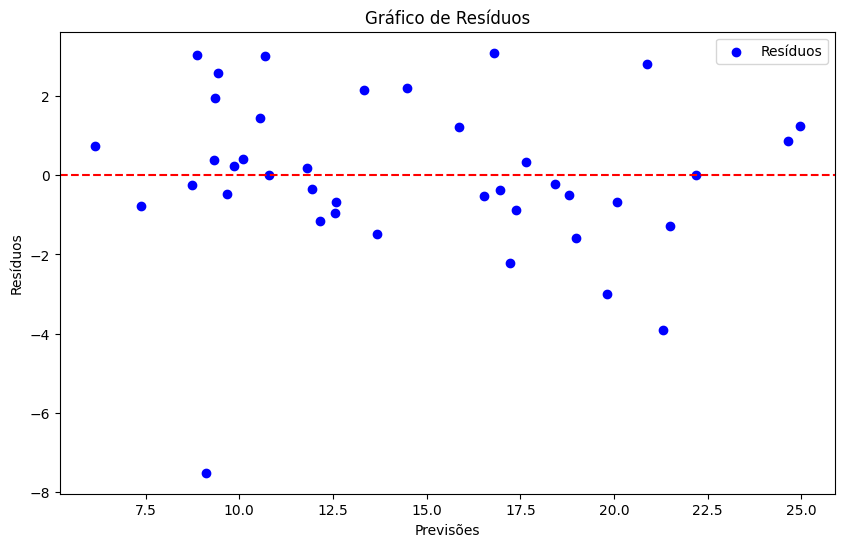

In [13]:
#Previsao usando Multipla Regressao Linear
df.head()
df1=df[['TV','Radio','Newspaper']].values
# scaler=StandardScaler()
X=np.array(df1)
X=X.reshape(-1,3)
Y=np.array(df['Sales']).reshape(-1,1)
print(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
r2=r2_score(Y_test,Y_predict)
print(r2)
print(model.coef_)
# Gerar uma grade de valores para TV e Radio
x = np.linspace(df['TV'].min(), df['TV'].max(), 100)
y = np.linspace(df['Radio'].min(), df['Radio'].max(), 100)
x, y = np.meshgrid(x, y)
z = model.intercept_ + model.coef_[0, 0] * x + model.coef_[0, 1] * y + model.coef_[0, 2] * np.mean(df['Newspaper'])  # Mantendo Newspaper fixo

# Criar o gráfico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.7)

# Adicionar os pontos reais
ax.scatter(df['TV'], df['Radio'], df['Sales'], color='red', label='Dados Reais')

# Configurar rótulos e título
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('Gráfico 3D da Regressão Linear Múltipla')

# Adicionar a legenda
ax.legend()

# Mostrar o gráfico
plt.show()

# Calcular os resíduos
residuals = Y_test - Y_predict

# Plotar resíduos
plt.figure(figsize=(10, 6))
plt.scatter(Y_predict, residuals, color='blue', label='Resíduos')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.legend()
plt.show()


